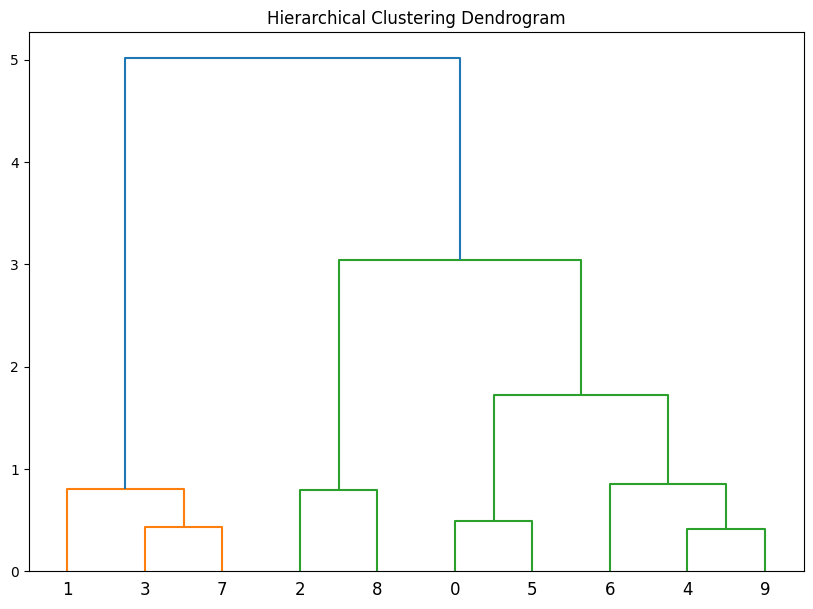

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [2]:

# Import necessary libraries
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate sample customer data
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'PurchaseFrequency': [5, 3, 8, 2, 6, 4, 7, 1, 9, 6],
    'AverageOrderValue': [100, 50, 200, 30, 150, 80, 120, 20, 250, 180]
}

df = pd.DataFrame(data)

# Select relevant features for clustering
features = df[['PurchaseFrequency', 'AverageOrderValue']]

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Generate the linkage matrix
Z = linkage(scaled_features, method='ward')

# Visualize the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Perform hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(scaled_features)

# Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels

# Visualize the clusters
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=cluster_labels)
plt.xlabel('Purchase Frequency (scaled)')
plt.ylabel('Average Order Value (scaled)')
plt.title('Customer Segmentation using Hierarchical Clustering')
plt.show()

# Print the cluster assignments
print(df)

